In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns',False)

In [12]:
url="https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
fuel_data = pd.read_csv(url,error_bad_lines=False)

In [13]:
fuel_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [14]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


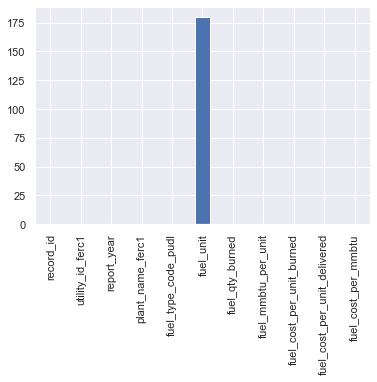

In [15]:
fuel_data.isnull().sum().plot(kind = 'bar')

# Getting lowest fuel_cost_per_unit_burned

In [23]:
fuel_data.groupby('fuel_type_code_pudl').mean()['fuel_cost_per_unit_burned'].sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

#  Getting standard deviation of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places

In [47]:
fuel_mmbtu_std = fuel_data.fuel_mmbtu_per_unit.std()
fuel_mmbtu_std_2d = np.round(fuel_mmbtu_std,2)
print('standard deviation of Fuel_mmbtu_per_unit to two decimal place: ',fuel_mmbtu_std_2d)

standard deviation of Fuel_mmbtu_per_unit to two decimal place:  10.6


# Getting 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places

In [48]:
fuel_mmbtu_75p = fuel_data.fuel_mmbtu_per_unit.quantile(0.75)
fuel_mmbtu_75p_2d = np.round(fuel_mmbtu_75p,2)
print('75th percentile of Fuel_mmbtu_per_unit to two decimal place: ',fuel_mmbtu_75p_2d)

75th percentile of Fuel_mmbtu_per_unit to two decimal place:  17.01


# skewness and kurtosis for the fuel quantity burned in two decimal places

getting skewness for the fuel quantity burned in two decimal places

In [49]:
fuel_qty_burned_skew = fuel_data.fuel_qty_burned.skew()
fuel_qty_burned_skew_2d = np.round(fuel_qty_burned_skew,2)
print('skewness for the fuel quantity burned in two decimal places : ',fuel_qty_burned_skew_2d)

skewness for the fuel quantity burned in two decimal places :  15.85


getting kurtosis for the fuel quantity burned in two decimal places

In [52]:
fuel_qty_burned_kurt = fuel_data.fuel_qty_burned.kurtosis()
fuel_qty_burned_kurt_2d = np.round(fuel_qty_burned_kurt,2)
print('kurtosis for the fuel quantity burned in two decimal places : ',fuel_qty_burned_kurt_2d)

kurtosis for the fuel quantity burned in two decimal places :  651.37


# getting missing value and missing feature`

In [97]:
missing_col = fuel_data.columns[fuel_data.isnull().any()]

num_missing = fuel_data[missing_col].isnull().sum()
percent_missing = num_missing/len(fuel_data)
percent_missing_3d = np.round(percent_missing,3)

print('Feature: {}, Total: {}, Percent: {} '.format(missing_col[0],num_missing[0],percent_missing_3d[0]))

Feature: fuel_unit, Total: 180, Percent: 0.006 


# correlation of features with  Fuel Cost Per Unit Burned

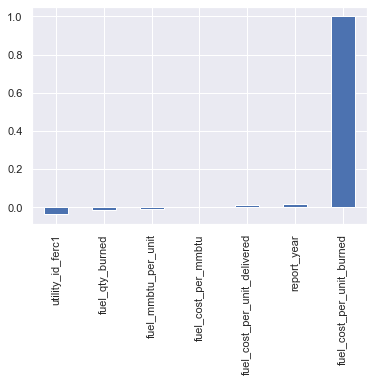

In [102]:
fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values().plot(kind = 'bar')

In [104]:
fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

# percentage change coal in the fuel cost per unit burned in 1998 compared to 1994

In [113]:
fuel_type_group_year = fuel_data.groupby(['report_year','fuel_type_code_pudl']).sum()['fuel_cost_per_unit_burned']

In [114]:
fuel_type_group_year.index = fu

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
                                       ...    
2018         coal                     9488.197
             gas                      4322.494
             nuclear                173267.161
             oil                     33836.602
             waste                     660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [126]:
fuel_change_percent = (fuel_type_group_year.loc[1998]['coal'] - fuel_type_group_year.loc[1994]['coal'])/fuel_type_group_year.loc[1994]['coal'] * 100

print('fuel cost per unit burned in 1998 compared to 1994 : ',np.round(fuel_change_percent,0))

fuel cost per unit burned in 1998 compared to 1994 :  -21.0


# getting year has the highest average fuel cost per unit delivered

In [138]:
highest_average_fuel_cost_per_unit = fuel_data.groupby(['report_year']).mean()['fuel_cost_per_unit_delivered'].nlargest(1)
print('highest_average_fuel_cost_per_unit : ',highest_average_fuel_cost_per_unit)

highest_average_fuel_cost_per_unit :  report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64
